##HOUSE PRICE DATA ANALYSIS

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the dataset
df=pd.read_csv("/content/House Price Prediction Dataset.csv")

In [4]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [5]:
df.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [6]:
df.shape

(2000, 10)

In [7]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [8]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [10]:
print(df.isnull().sum())  # Check for missing values in the dataset

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


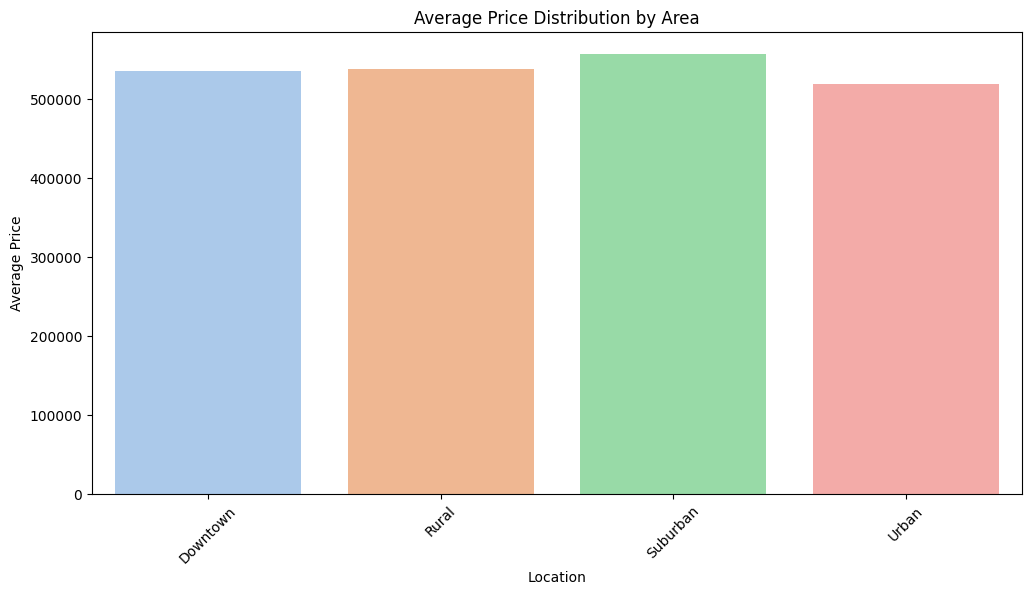

In [12]:
# Assuming 'df' is your dataframe
plt.figure(figsize=(12, 6))

# Calculate average price based on location
avg_price_by_location = df.groupby('Location')['Price'].mean().reset_index()

# Create a bar plot with different colors
sns.barplot(data=avg_price_by_location, x='Location', y='Price', hue='Location', dodge=False, palette='pastel', legend=False)

plt.title('Average Price Distribution by Area')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

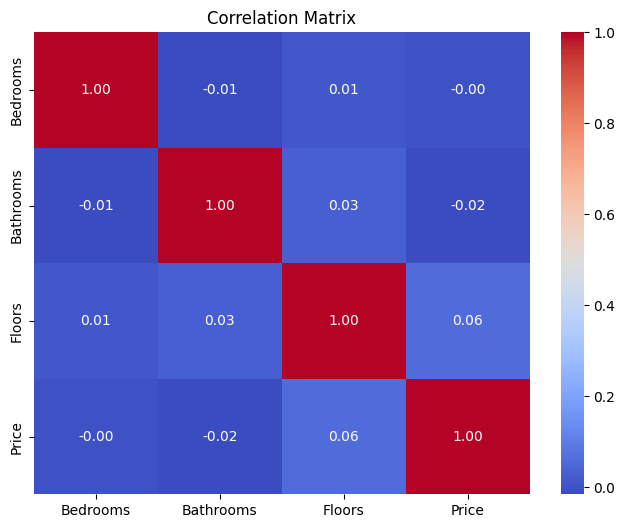

In [13]:
# 2. How do the number of bedrooms, bathrooms, and floors correlate with the price of the houses?
correlation = df[['Bedrooms', 'Bathrooms', 'Floors', 'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

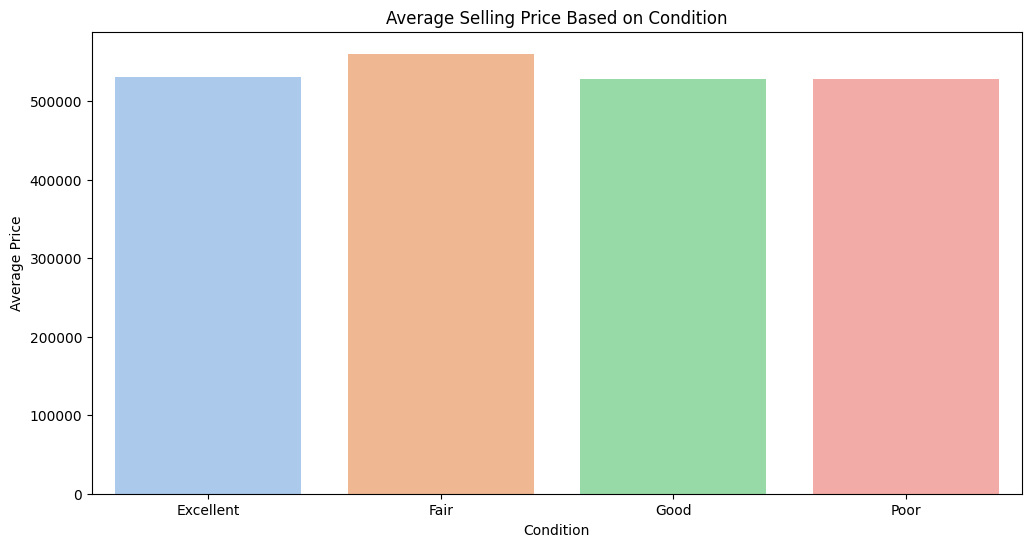

In [15]:
# Assuming 'df' is your dataframe
plt.figure(figsize=(12, 6))

# Calculate average price based on condition
avg_price_by_condition = df.groupby('Condition')['Price'].mean().reset_index()

# Create a bar plot with different colors
sns.barplot(data=avg_price_by_condition, x='Condition', y='Price', hue='Condition', dodge=False, palette='pastel', legend=False)

plt.title('Average Selling Price Based on Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.show()


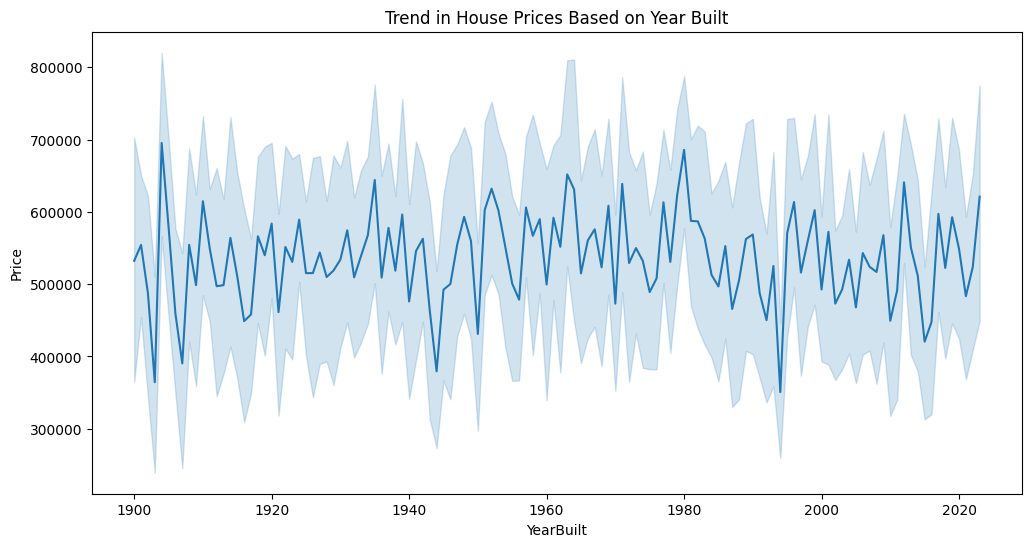

In [16]:
# 4. Is there a trend in house prices based on the year the houses were built? Are older houses priced lower compared to newer constructions?
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YearBuilt', y='Price', estimator='mean')
plt.title('Trend in House Prices Based on Year Built')
plt.show()

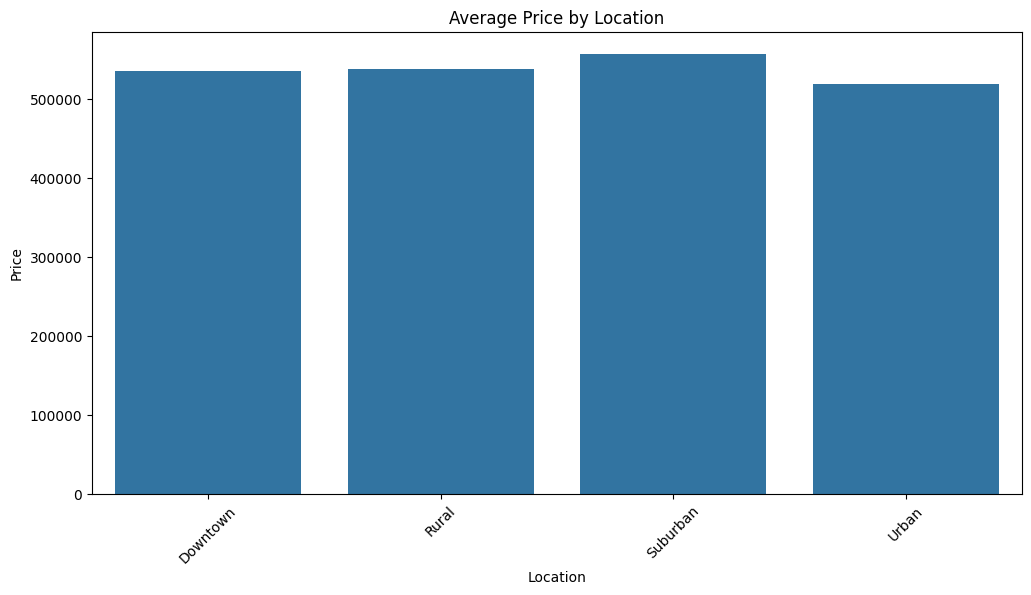

In [17]:
# 5. How does the location impact the price of the house? Which locations yield the highest average prices?
avg_price_by_location = df.groupby('Location')['Price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_location, x='Location', y='Price')
plt.title('Average Price by Location')
plt.xticks(rotation=45)
plt.show()

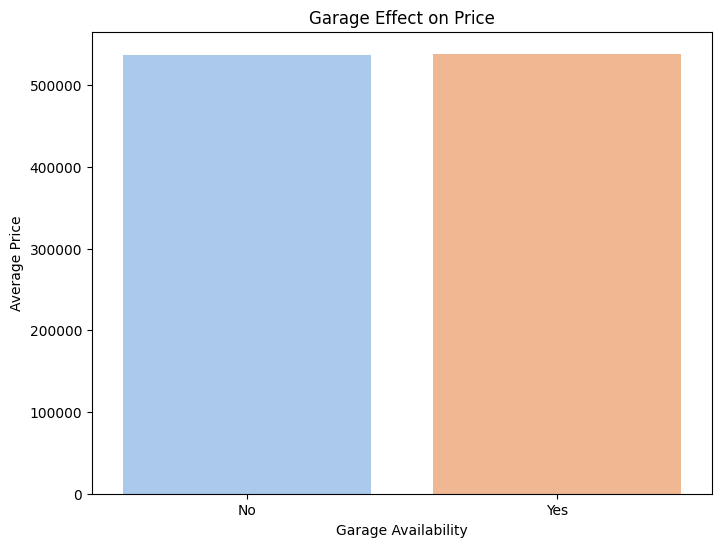

In [19]:
# 6. Does having a garage significantly influence the price of a house compared to those without a garage?
plt.figure(figsize=(8, 6))

# Calculate average price based on garage availability
avg_price_by_garage = df.groupby('Garage')['Price'].mean().reset_index()

# Create a bar plot with corrected parameters
sns.barplot(data=avg_price_by_garage, x='Garage', y='Price', hue='Garage', dodge=False, palette='pastel', legend=False)
plt.title('Garage Effect on Price')
plt.xlabel('Garage Availability')
plt.ylabel('Average Price')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.show()


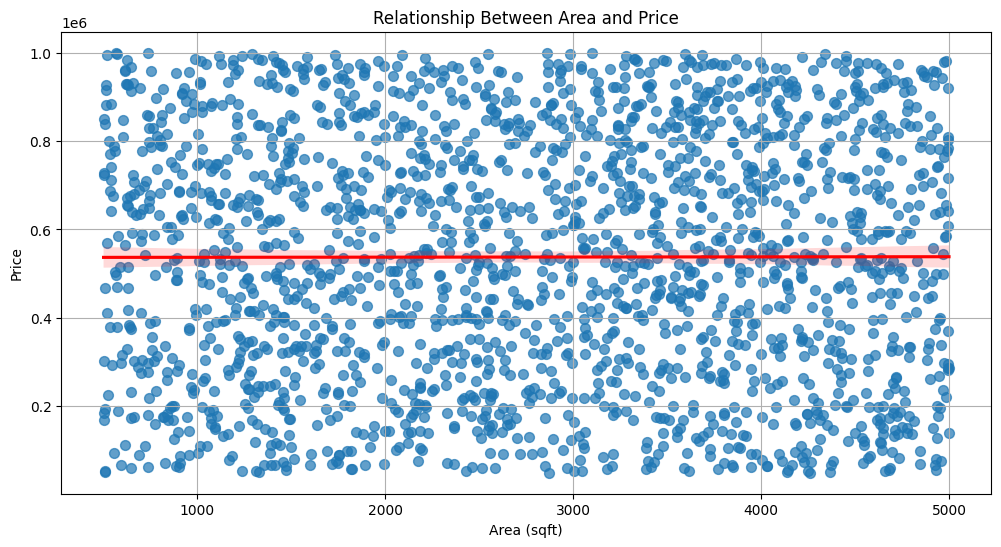

In [20]:
# 7. What is the relationship between the area (sqft) of the house and its price? Is there a linear correlation?
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
sns.regplot(data=df, x='Area', y='Price', marker='o', scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})

plt.title('Relationship Between Area and Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.grid(True)  # Add grid for better readability
plt.show()

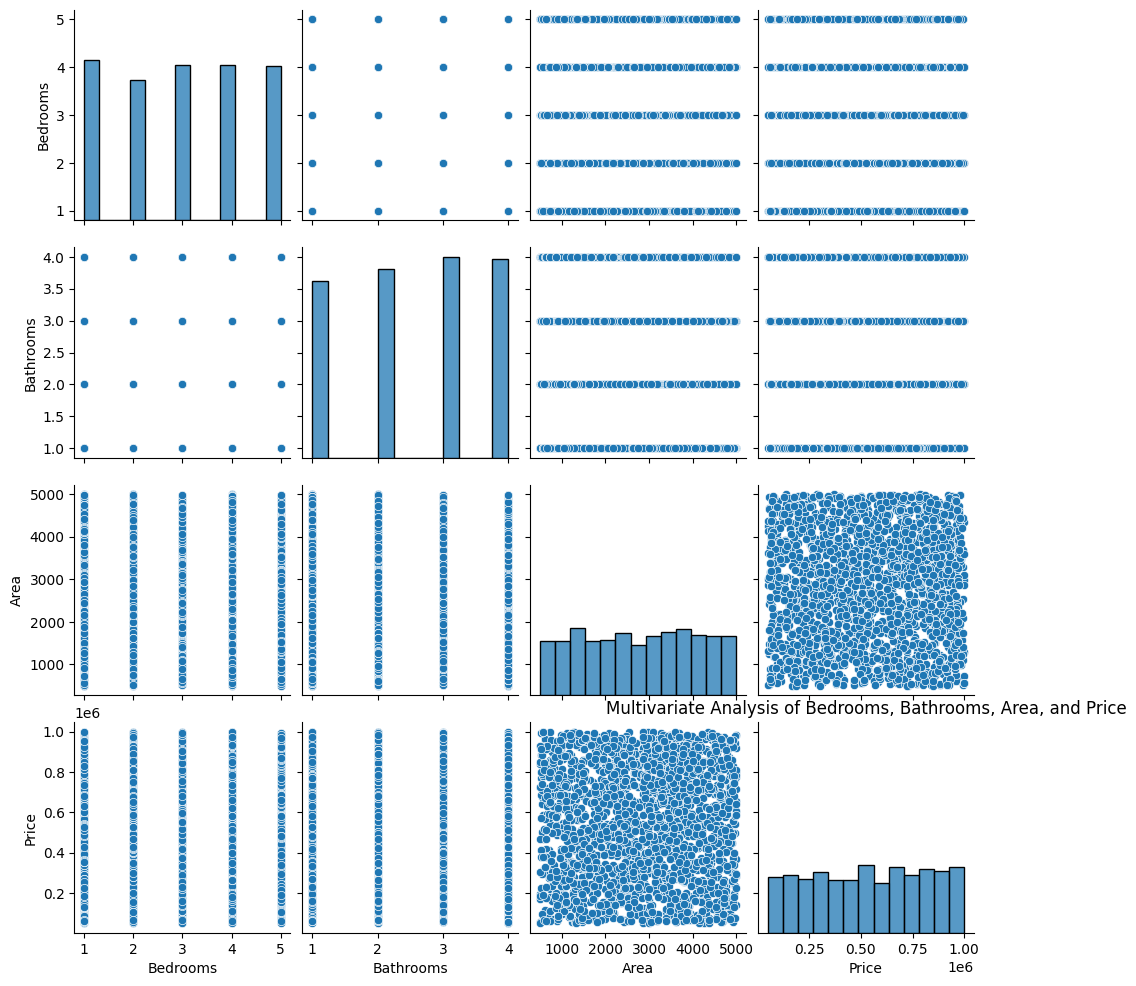

In [21]:
# 8. What is the combined effect of bedrooms, bathrooms, and area on the house price?
sns.pairplot(df, vars=['Bedrooms', 'Bathrooms', 'Area', 'Price'])
plt.title('Multivariate Analysis of Bedrooms, Bathrooms, Area, and Price')
plt.show()

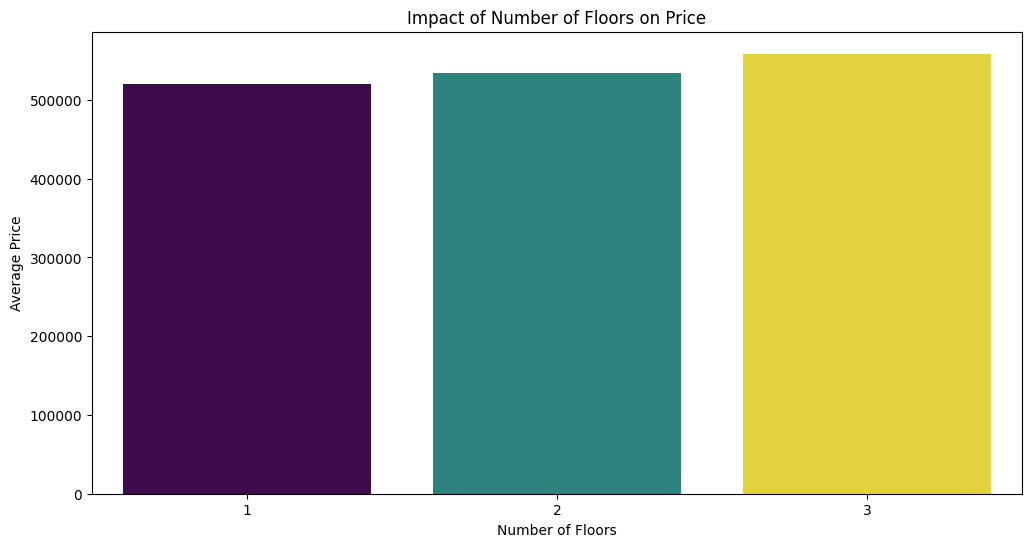

In [23]:
# 9. How does the number of floors impact the price of houses in different conditions?
plt.figure(figsize=(12, 6))

# Calculate average price based on the number of floors
avg_price_by_floors = df.groupby('Floors')['Price'].mean().reset_index()

# Create a bar plot with corrected parameters
sns.barplot(data=avg_price_by_floors, x='Floors', y='Price', hue='Floors', dodge=False, palette='viridis', legend=False)
plt.title('Impact of Number of Floors on Price')
plt.xlabel('Number of Floors')
plt.ylabel('Average Price')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.show()


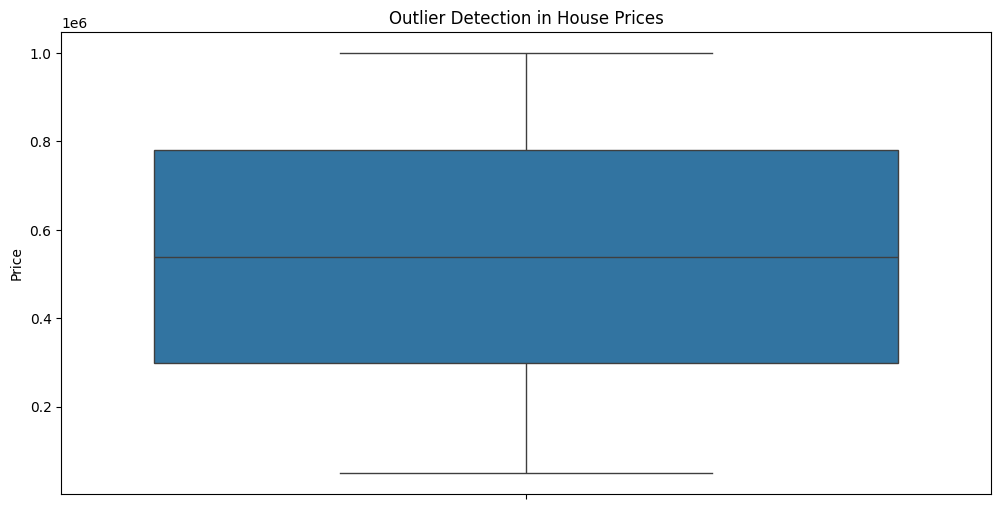

In [24]:
# 10. Are there any outliers in the dataset that significantly deviate from the average house price, and what factors might contribute to these outliers?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Price')
plt.title('Outlier Detection in House Prices')
plt.show()

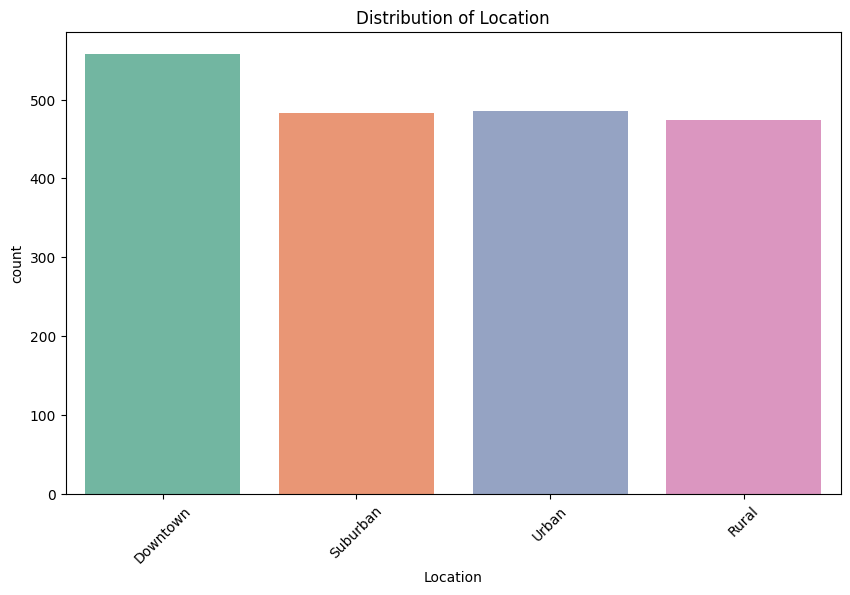

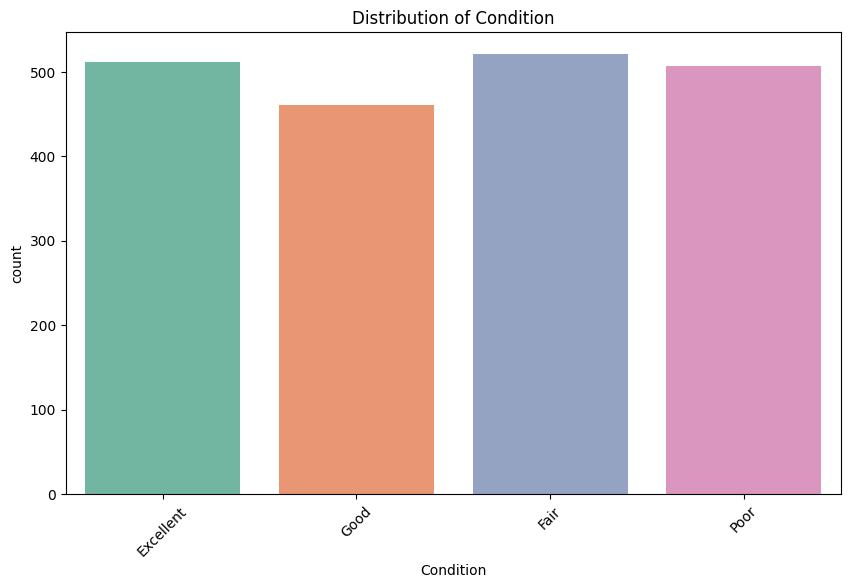

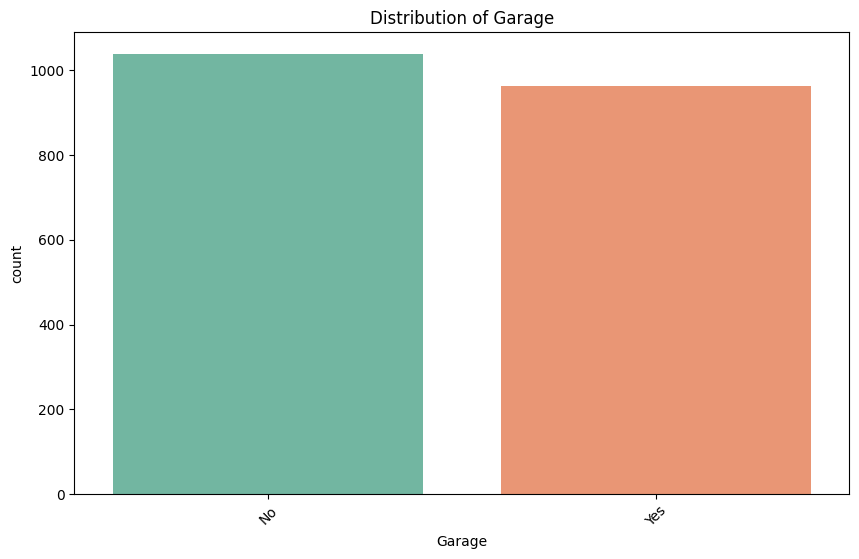

In [26]:
# 11. What are the distributions and frequencies of houses based on their location, condition, garage availability,
# number of bedrooms, number of bathrooms, and number of floors in the dataset?

for col in df:
    if df[col].dtype == 'object':  # Check if the column is categorical
        plt.figure(figsize=(10, 6))
        # Adjusting parameters to resolve FutureWarning
        sns.countplot(data=df, x=col, hue=col, dodge=False, palette='Set2', legend=False)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
        plt.show()  # Show the plot


##Feature Engineering

In [27]:
location_avg_price = df.groupby('Location')['Price'].transform('mean')
df['Location_ratio'] = df['Price'] / location_avg_price  # Calculate location price ratio

print(df[['Location', 'Price', 'Location_ratio']])  # Display the relevant columns

# Function for encoding features
def encoding_features(dataframe):
    condition_mapping = {'Excellent': 1, 'Fair': 2, 'Good': 3, 'Poor': 4}
    location_mapping = {'Downtown': 1, 'Rural': 2, 'Suburban': 3, 'Urban': 4}
    dataframe = dataframe.copy()
    dataframe['ConditionEncoding'] = dataframe['Condition'].map(condition_mapping)  # Encode condition
    dataframe['LocationalEncoding'] = dataframe['Location'].map(location_mapping)  # Encode location

    return dataframe

df = encoding_features(df)  # Apply encoding function

# Convert Yes/No values to 1/0 for Garage feature
df['Garage'] = df['Garage'].map({'Yes': 1, 'No': 0})

print(df['Garage'].head())  # Display the first few values of the Garage column

      Location   Price  Location_ratio
0     Downtown  149919        0.279668
1     Downtown  424998        0.792818
2     Downtown  266746        0.497605
3     Suburban  244020        0.437770
4     Downtown  636056        1.186540
...        ...     ...             ...
1995  Suburban  295620        0.530340
1996  Suburban  580929        1.042182
1997     Rural  476925        0.885467
1998     Urban  161119        0.310463
1999  Suburban  482525        0.865646

[2000 rows x 3 columns]
0    0
1    0
2    0
3    1
4    1
Name: Garage, dtype: int64


##IMPLEMENTING LINEAR REGRESSION

In [28]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [29]:
# Evaluate results using Linear Regression
x = df.drop(['Price', 'Condition', 'Location'], axis=1)  # Features
y = df['Price']  # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()  # Initialize Linear Regression model
lr.fit(x_train, y_train)  # Fit the model to training data

y_pred = lr.predict(x_test)  # Make predictions on the test data

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
msa = mean_absolute_error(y_test, y_pred)

print('Linear Regression Score')
print('----------------------')
print(f'R2 Score: {r2}')  # Print R2 Score
print(f'Mean Absolute Error: {msa}')  # Print Mean Absolute Error

# Regression coefficients
coefficients = lr.coef_
print(f"Regression Coefficients: {coefficients}")  # Display regression coefficients

Linear Regression Score
----------------------
R2 Score: 0.9968288033295096
Mean Absolute Error: 11397.428516638882
Regression Coefficients: [-6.39855959e-01 -1.81809686e-01  2.66803634e+01 -3.85673346e+02
 -5.14396922e+02  7.15145460e+00  6.51573747e+02  5.35760990e+05
 -1.83690263e+02 -3.24096191e+03]
